In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tsne import tsne
from PIL import Image

Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Running example on 2,500 MNIST digits...
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.386597
Iteration 10: error is 23.621143
Iteration 20: error is 21.133059
Iteration 30: error is 18.300882
Iteration 40: error is 17.124210
Iteration 50: error is 16.687980
Iteration 60: error is 16.447097
Iteration 70: error is 16.269226
Iteration 80: error is 16.138329
Iteration 90: error is 16.053891
Iteration 100: error is 15.988332
Iteration 110: error is 2.308931
Iteration 120: error is 2.069381
Iteration 130: error is 1.895411
Iteration 140: error is 1.761541
Iteration 150: error is 1.655909
Iteration 160: error is 1.573008
Iteration 170: error is 1.506374
It

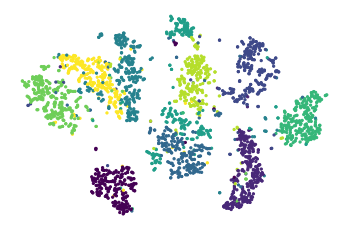

In [2]:
print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
print("Running example on 2,500 MNIST digits...")
X = np.loadtxt("mnist2500_X.txt")
labels = np.loadtxt("mnist2500_labels.txt")
Y = tsne(X, 2, 50, 20.0, sne_type='tsne')
# Y = tsne(X, 2, 50, 20.0, sne_type='ssne')

plt.axis('off')
plt.scatter(Y[:, 0], Y[:, 1], s=5, c=labels)
plt.show()

In [3]:
%%capture
# suppress pyplot outputs

Y_list=np.load('Y_list.npy')
!rm -f gif/tmp/*
for i in range(50):
    Y = Y_list[i]
    plt.figure()
    plt.axis('off')
    plt.scatter(Y[:, 0], Y[:, 1], s=5, c=labels)
    plt.savefig(f'gif/tmp/{i}.png')

imgs = []
for i in range(50):
    imgs.append(Image.open(f'gif/tmp/{i}.png'))

imgs[0].save('gif/tsne.gif', format='GIF', append_images=imgs[1:], save_all=True, duration=200, loop=0)

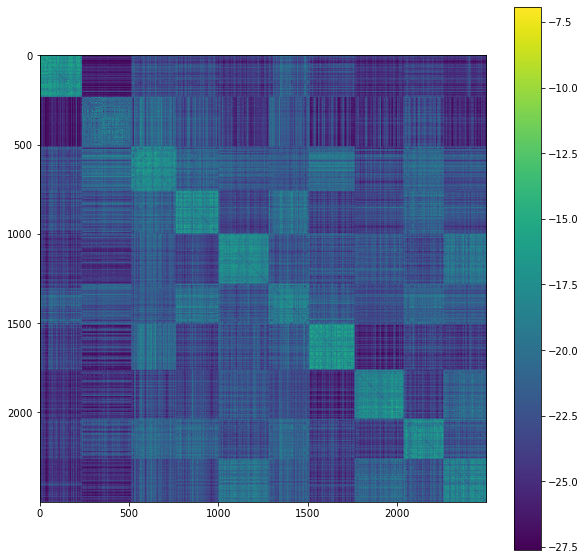

In [4]:
P = np.load('P.npy')
P = np.log(P) # original P is too small
index = np.argsort(labels)
P = P[index][:, index] # put similarity of same labels nearby
plt.figure(figsize=(10, 10))
plt.imshow(P, vmin=np.min(P), vmax=np.max(P))
plt.colorbar()
plt.show()

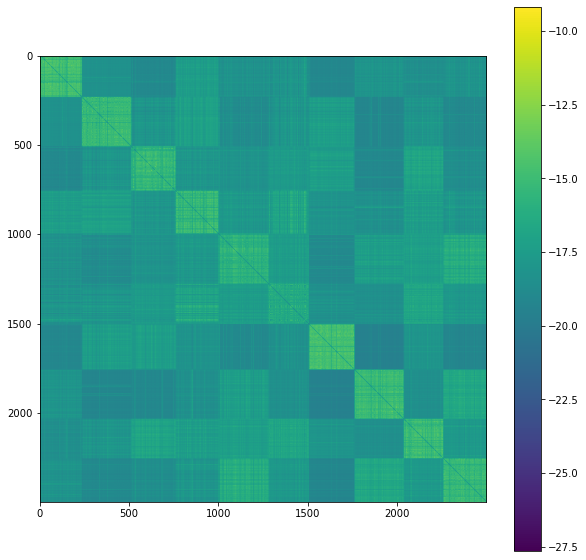

In [5]:
Q = np.load('Q.npy')
Q = np.log(Q) # original P is too small
index = np.argsort(labels)
Q = Q[index][:, index] # put similarity of same labels nearby
plt.figure(figsize=(10, 10))
plt.imshow(Q, vmin=np.min(Q), vmax=np.max(Q))
plt.colorbar()
plt.show()